Step 1: List Down Features and Their Types
The Iris dataset contains the following columns:

sepal_length: Numeric (continuous)

sepal_width: Numeric (continuous)

petal_length: Numeric (continuous)

petal_width: Numeric (continuous)

species: Nominal (categorical)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
Features and their types:

sepal_length --> Numeric
sepal_width --> Numeric
petal_length --> Numeric
petal_width --> Numeric
species --> Nominal

Cr

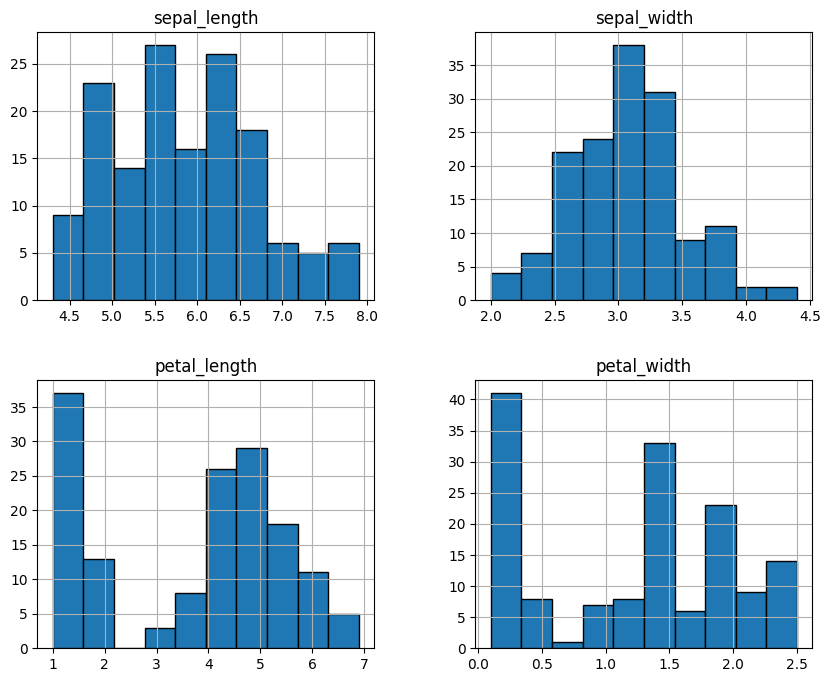


Creating Boxplots for each feature...


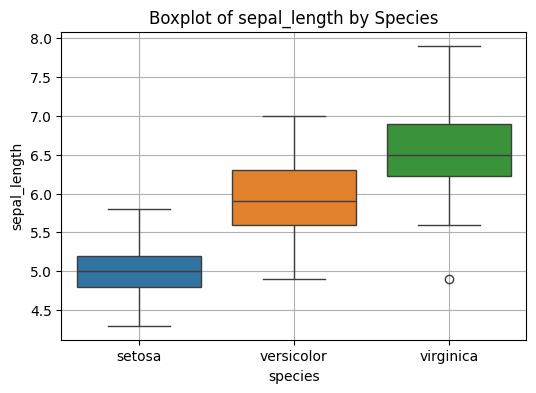

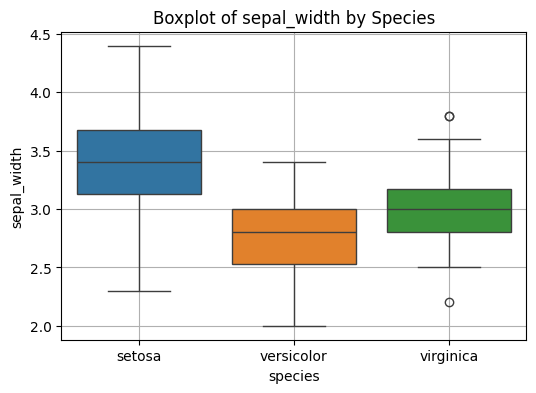

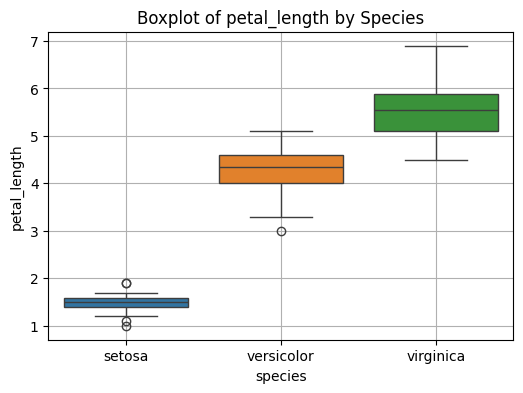

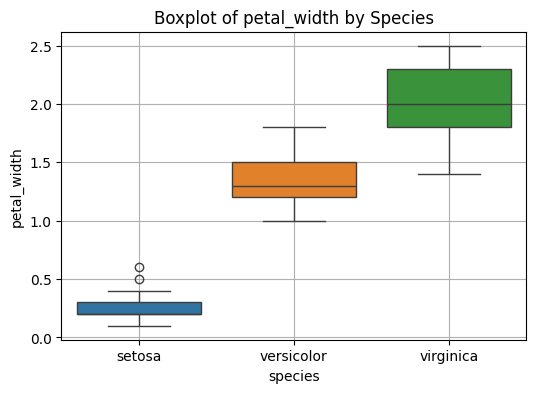


Checking for Outliers using IQR method:
sepal_length: No significant outliers found.
sepal_width: 4 outlier(s) found.
petal_length: No significant outliers found.
petal_width: No significant outliers found.
species: Non-numeric column, skipped.


In [2]:
# practical10

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/Paras/OneDrive/Desktop/dsbda/chit3descriptivestats/iris.csv")
print(df)

print("Features and their types:\n")
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        print(f"{column} --> Numeric")
    else:
        print(f"{column} --> Nominal")
        

print("\nCreating Histograms for each feature...")

# Plot histogram
df.hist(figsize=(10, 8), edgecolor='black')
plt.show()

print("\nCreating Boxplots for each feature...")

# Create boxplots for only numeric columns
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='species', y=column, hue='species', data=df)
        plt.title(f"Boxplot of {column} by Species")
        plt.grid(True)
        plt.show()

print("\nChecking for Outliers using IQR method:")

# Outlier detection using Interquartile Range (IQR)
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Check if column is numeric
        Q1 = df[column].quantile(0.25)  # 25th percentile
        Q3 = df[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1                   # IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR     # Lower fence
        upper_bound = Q3 + 1.5 * IQR     # Upper fence

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        if outliers.empty:
            print(f"{column}: No significant outliers found.")
        else:
            print(f"{column}: {len(outliers)} outlier(s) found.")
    else:
        print(f"{column}: Non-numeric column, skipped.")


Step 4: Compare Distributions and Identify Outliers
After plotting the histograms and boxplots, let's analyze them.

Histograms:

Sepal Length and Petal Length: These features have a relatively normal distribution with a peak at certain values. Petal length shows a more pronounced right-skew, whereas sepal length appears more evenly distributed.

Sepal Width and Petal Width: Both of these features exhibit more variation, with petal width showing a slight right skew.

Boxplots:

Outliers: Outliers are clearly visible in the boxplots:

Petal Length: There are a few higher values that might be considered outliers.

Sepal Width: The boxplot reveals some outliers on the higher end.

Median: The boxplots reveal that the medians of all features (except petal width) are fairly centered within the interquartile range (IQR).

Feature Comparison:

Petal Length vs Petal Width: Petal length has a larger range compared to petal width, and petal width has more tightly clustered data.

Sepal Length vs Sepal Width: Sepal length has a wider distribution compared to sepal width, which is more concentrated around the median.

Observations and Inferences:
Petal Length and Petal Width have relatively similar distributions, with Petal Length having a larger range.

Sepal Width seems to have more variation, especially in the upper range, indicating potential outliers.

Species Distribution: Since the dataset contains different species of Iris flowers, you might want to explore the relationship between these features and the species (e.g., by using a pair plot or scatter plot to compare features across species).

